# 1. initial Setup and Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#import numpy for number array handling and represent rgb image pixel values
import numpy as np

#import tensorflow to use any tools needed for deep learning
import tensorflow as tf

# from focal_loss import SparseCategoricalFocalLoss

#import libraries for visualization of data
import matplotlib.pyplot as plt

#Allow charts and graphics to display right below the page of browser setup
%matplotlib inline

2024-04-23 14:49:40.370507: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from garbage.garbage_classifier import GarbageClassifier
from garbage.mlflow_tracker import MLFlowTracker
from metrics import plot_loss, plot_accuracy, print_confusion_matrix
from utils import show_worst_preds, crop_resize_image

# 2. Load and Split images along with applying Data Preprocessing and Data Augmentation

In [4]:
#paths to the train, validation and test image datasets
train_path = '../datasets/kaggle_dataset2/images/'
valid_path = '../datasets/kaggle_dataset2/images/'

BATCH_SIZE = 16
CLASSES = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

tracker = MLFlowTracker("trash-classification")

classifier = GarbageClassifier(CLASSES, BATCH_SIZE, tracker)
classifier.load_dataset(train_path, valid_path)

train_batches = classifier.train_batches
valid_batches = classifier.valid_batches

2024/04/23 14:49:43 INFO mlflow.tracking.fluent: Experiment with name 'trash-classification' does not exist. Creating a new experiment.


Found 2150 images belonging to 6 classes.
Found 377 images belonging to 6 classes.

Training set distribution:
cardboard: 343 images
glass: 426 images
metal: 349 images
paper: 505 images
plastic: 410 images
trash: 117 images

Validation set distribution:
cardboard: 60 images
glass: 75 images
metal: 61 images
paper: 89 images
plastic: 72 images
trash: 20 images


# 3. Visualization of the images after Preprocessing

In [5]:
# plot images after applying VGG16 data preprocessing method
def plotImages(images):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img.astype(np.uint8))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

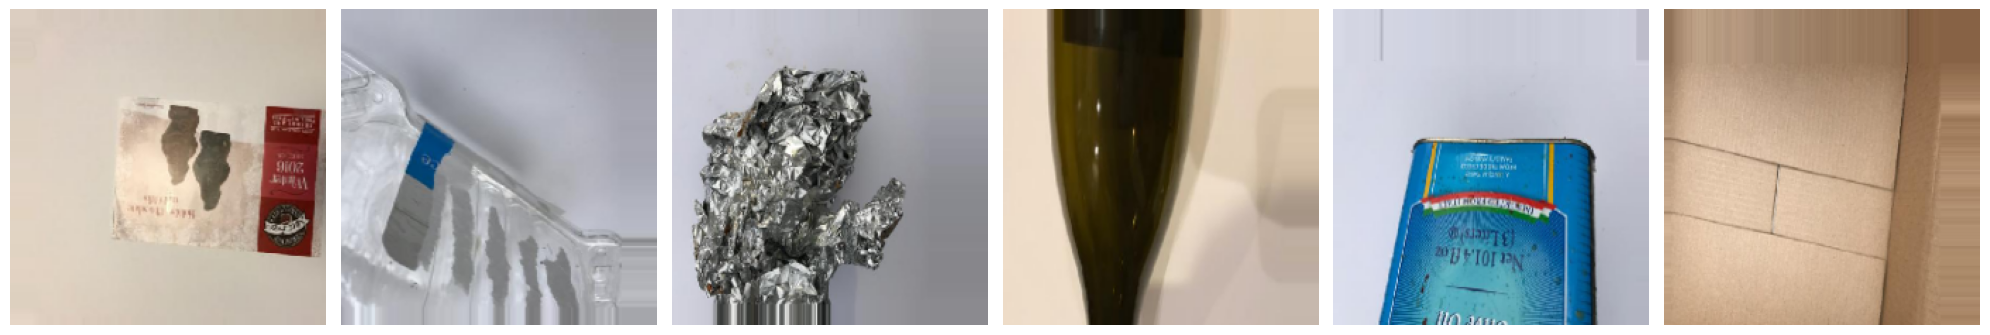

In [6]:
imgs, labels = next(train_batches)
plotImages(imgs)

# 4. Building CNN Architecture

In [7]:
# set the input image size for proposed CNN model
classifier.build_model()

12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# 5. Compile the Built CNN Model

In [8]:
classifier.compile()

# 6. Train the CNN model

In [9]:
# train the model with appropriate number of epochs
model_details = classifier.fit(epochs=20)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


135/135 - 31s - 230ms/step - accuracy: 0.6898 - loss: 2.5869 - val_accuracy: 0.8117 - val_loss: 2.1830 - learning_rate: 5.0000e-04
Epoch 2/20
135/135 - 26s - 196ms/step - accuracy: 0.8344 - loss: 2.0967 - val_accuracy: 0.8647 - val_loss: 1.9843 - learning_rate: 5.0000e-04
Epoch 3/20
135/135 - 26s - 196ms/step - accuracy: 0.8619 - loss: 1.9160 - val_accuracy: 0.8753 - val_loss: 1.8844 - learning_rate: 5.0000e-04
Epoch 4/20
135/135 - 26s - 196ms/step - accuracy: 0.8888 - loss: 1.7910 - val_accuracy: 0.8780 - val_loss: 1.7645 - learning_rate: 5.0000e-04
Epoch 5/20
135/135 - 26s - 196ms/step - accuracy: 0.9060 - loss: 1.6524 - val_accuracy: 0.8780 - val_loss: 1.7134 - learning_rate: 5.0000e-04
Epoch 6/20
135/135 - 27s - 197ms/step - accuracy: 0.9167 - loss: 1.5577 - val_accuracy: 0.8753 - val_loss: 1.6494 - learning_rate: 5.0000e-04
Epoch 7/20
135/135 - 27s - 198ms/step - accuracy: 0.9279 - loss: 1.4398 - val_accuracy: 0.8276 - val_loss: 1.6738 - learning_rate: 5.0000e-04
Epoch 8/20
135/13

In [10]:
# store the losses of training
loss = model_details.history['loss']
validation_loss = model_details.history['val_loss']

In [11]:
# store the accuracy of training
accuracy = model_details.history['accuracy']
validation_accuracy = model_details.history['val_accuracy']

# 7. Fine Tune the CNN model

In [12]:
# unfreeze the convolution base of the base model inorder to fine-tune which adapt these pre-trained weights
# to work with the new dataset
classifier.base_model.trainable=True

In [13]:
# train and fine-tune the model with appropriate number of epochs
model_details = classifier.fit(epochs=10)

Epoch 1/10
135/135 - 27s - 197ms/step - accuracy: 0.9526 - loss: 0.7444 - val_accuracy: 0.8780 - val_loss: 0.9693 - learning_rate: 5.0000e-04
Epoch 2/10
135/135 - 27s - 197ms/step - accuracy: 0.9465 - loss: 0.7273 - val_accuracy: 0.8833 - val_loss: 1.0065 - learning_rate: 5.0000e-04
Epoch 3/10
135/135 - 27s - 196ms/step - accuracy: 0.9605 - loss: 0.6790 - val_accuracy: 0.8568 - val_loss: 1.0238 - learning_rate: 5.0000e-04
Epoch 4/10
135/135 - 26s - 196ms/step - accuracy: 0.9488 - loss: 0.6765 - val_accuracy: 0.8568 - val_loss: 1.0717 - learning_rate: 5.0000e-04
Epoch 5/10
135/135 - 27s - 196ms/step - accuracy: 0.9530 - loss: 0.6580 - val_accuracy: 0.8753 - val_loss: 0.9041 - learning_rate: 5.0000e-04
Epoch 6/10
135/135 - 26s - 196ms/step - accuracy: 0.9302 - loss: 0.7027 - val_accuracy: 0.8674 - val_loss: 1.0225 - learning_rate: 5.0000e-04
Epoch 7/10
135/135 - 26s - 196ms/step - accuracy: 0.9591 - loss: 0.6299 - val_accuracy: 0.8276 - val_loss: 1.0544 - learning_rate: 5.0000e-04
Epoch 

# 8. Visualization of Accuracy and Loss in Training and  Validation sets

In [14]:
# append the losses to previous stored losses
loss.extend(model_details.history['loss'])
validation_loss.extend(model_details.history['val_loss'])

In [15]:
# append the accuracy to previous stored accuracy
accuracy.extend(model_details.history['accuracy'])
validation_accuracy.extend(model_details.history['val_accuracy'])

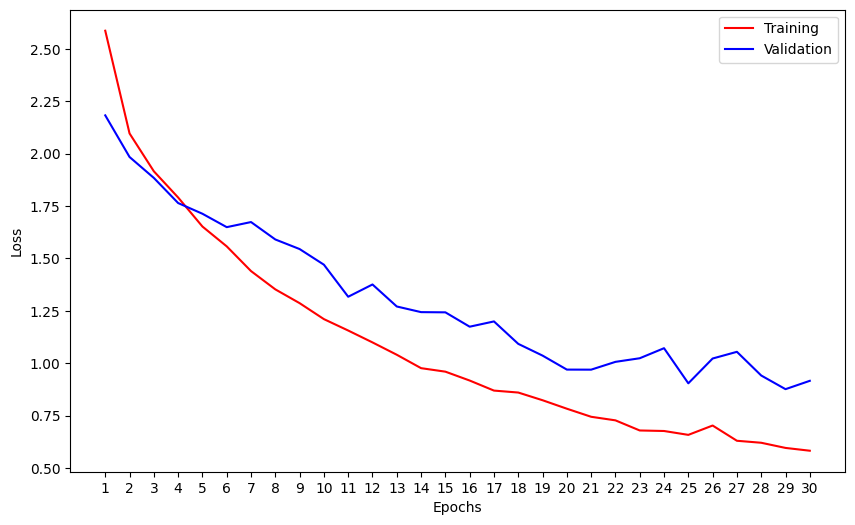

In [16]:
# plot the training and validation losses
plot_loss(loss, validation_loss)

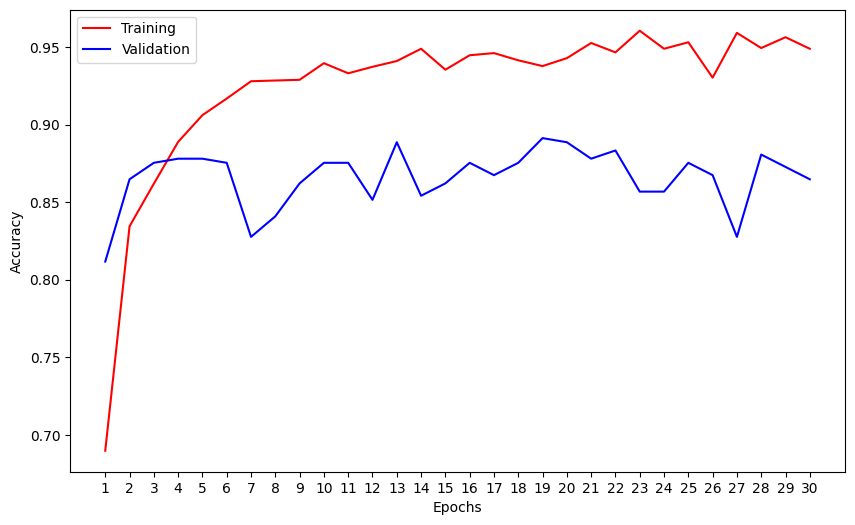

In [17]:
# plot the training and validation accuracy
plot_accuracy(accuracy, validation_accuracy)

# Finish tracker run

In [18]:
classifier.tracker.finish_run()

# Confusion matrix

In [19]:
Y_pred = classifier.predict(valid_batches)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step


Classification Report
              precision    recall  f1-score   support

   cardboard       0.96      0.87      0.91        60
       glass       0.88      0.88      0.88        75
       metal       0.79      0.95      0.87        61
       paper       0.92      0.89      0.90        89
     plastic       0.90      0.76      0.83        72
       trash       0.57      0.80      0.67        20

    accuracy                           0.86       377
   macro avg       0.84      0.86      0.84       377
weighted avg       0.88      0.86      0.87       377



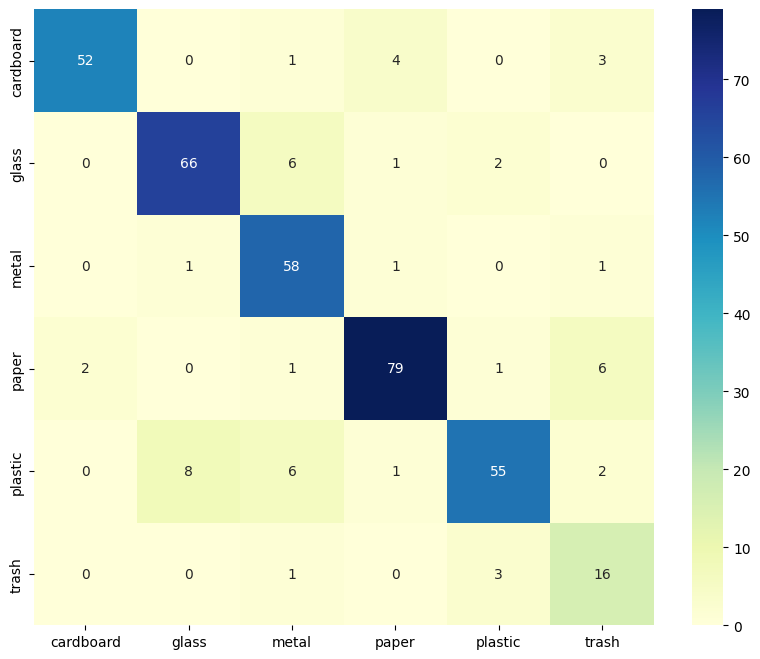

In [20]:
print_confusion_matrix(classifier.model, valid_batches, Y_pred, CLASSES)

## Print problematic cases

Got 29 worst predictions


<Figure size 640x480 with 0 Axes>

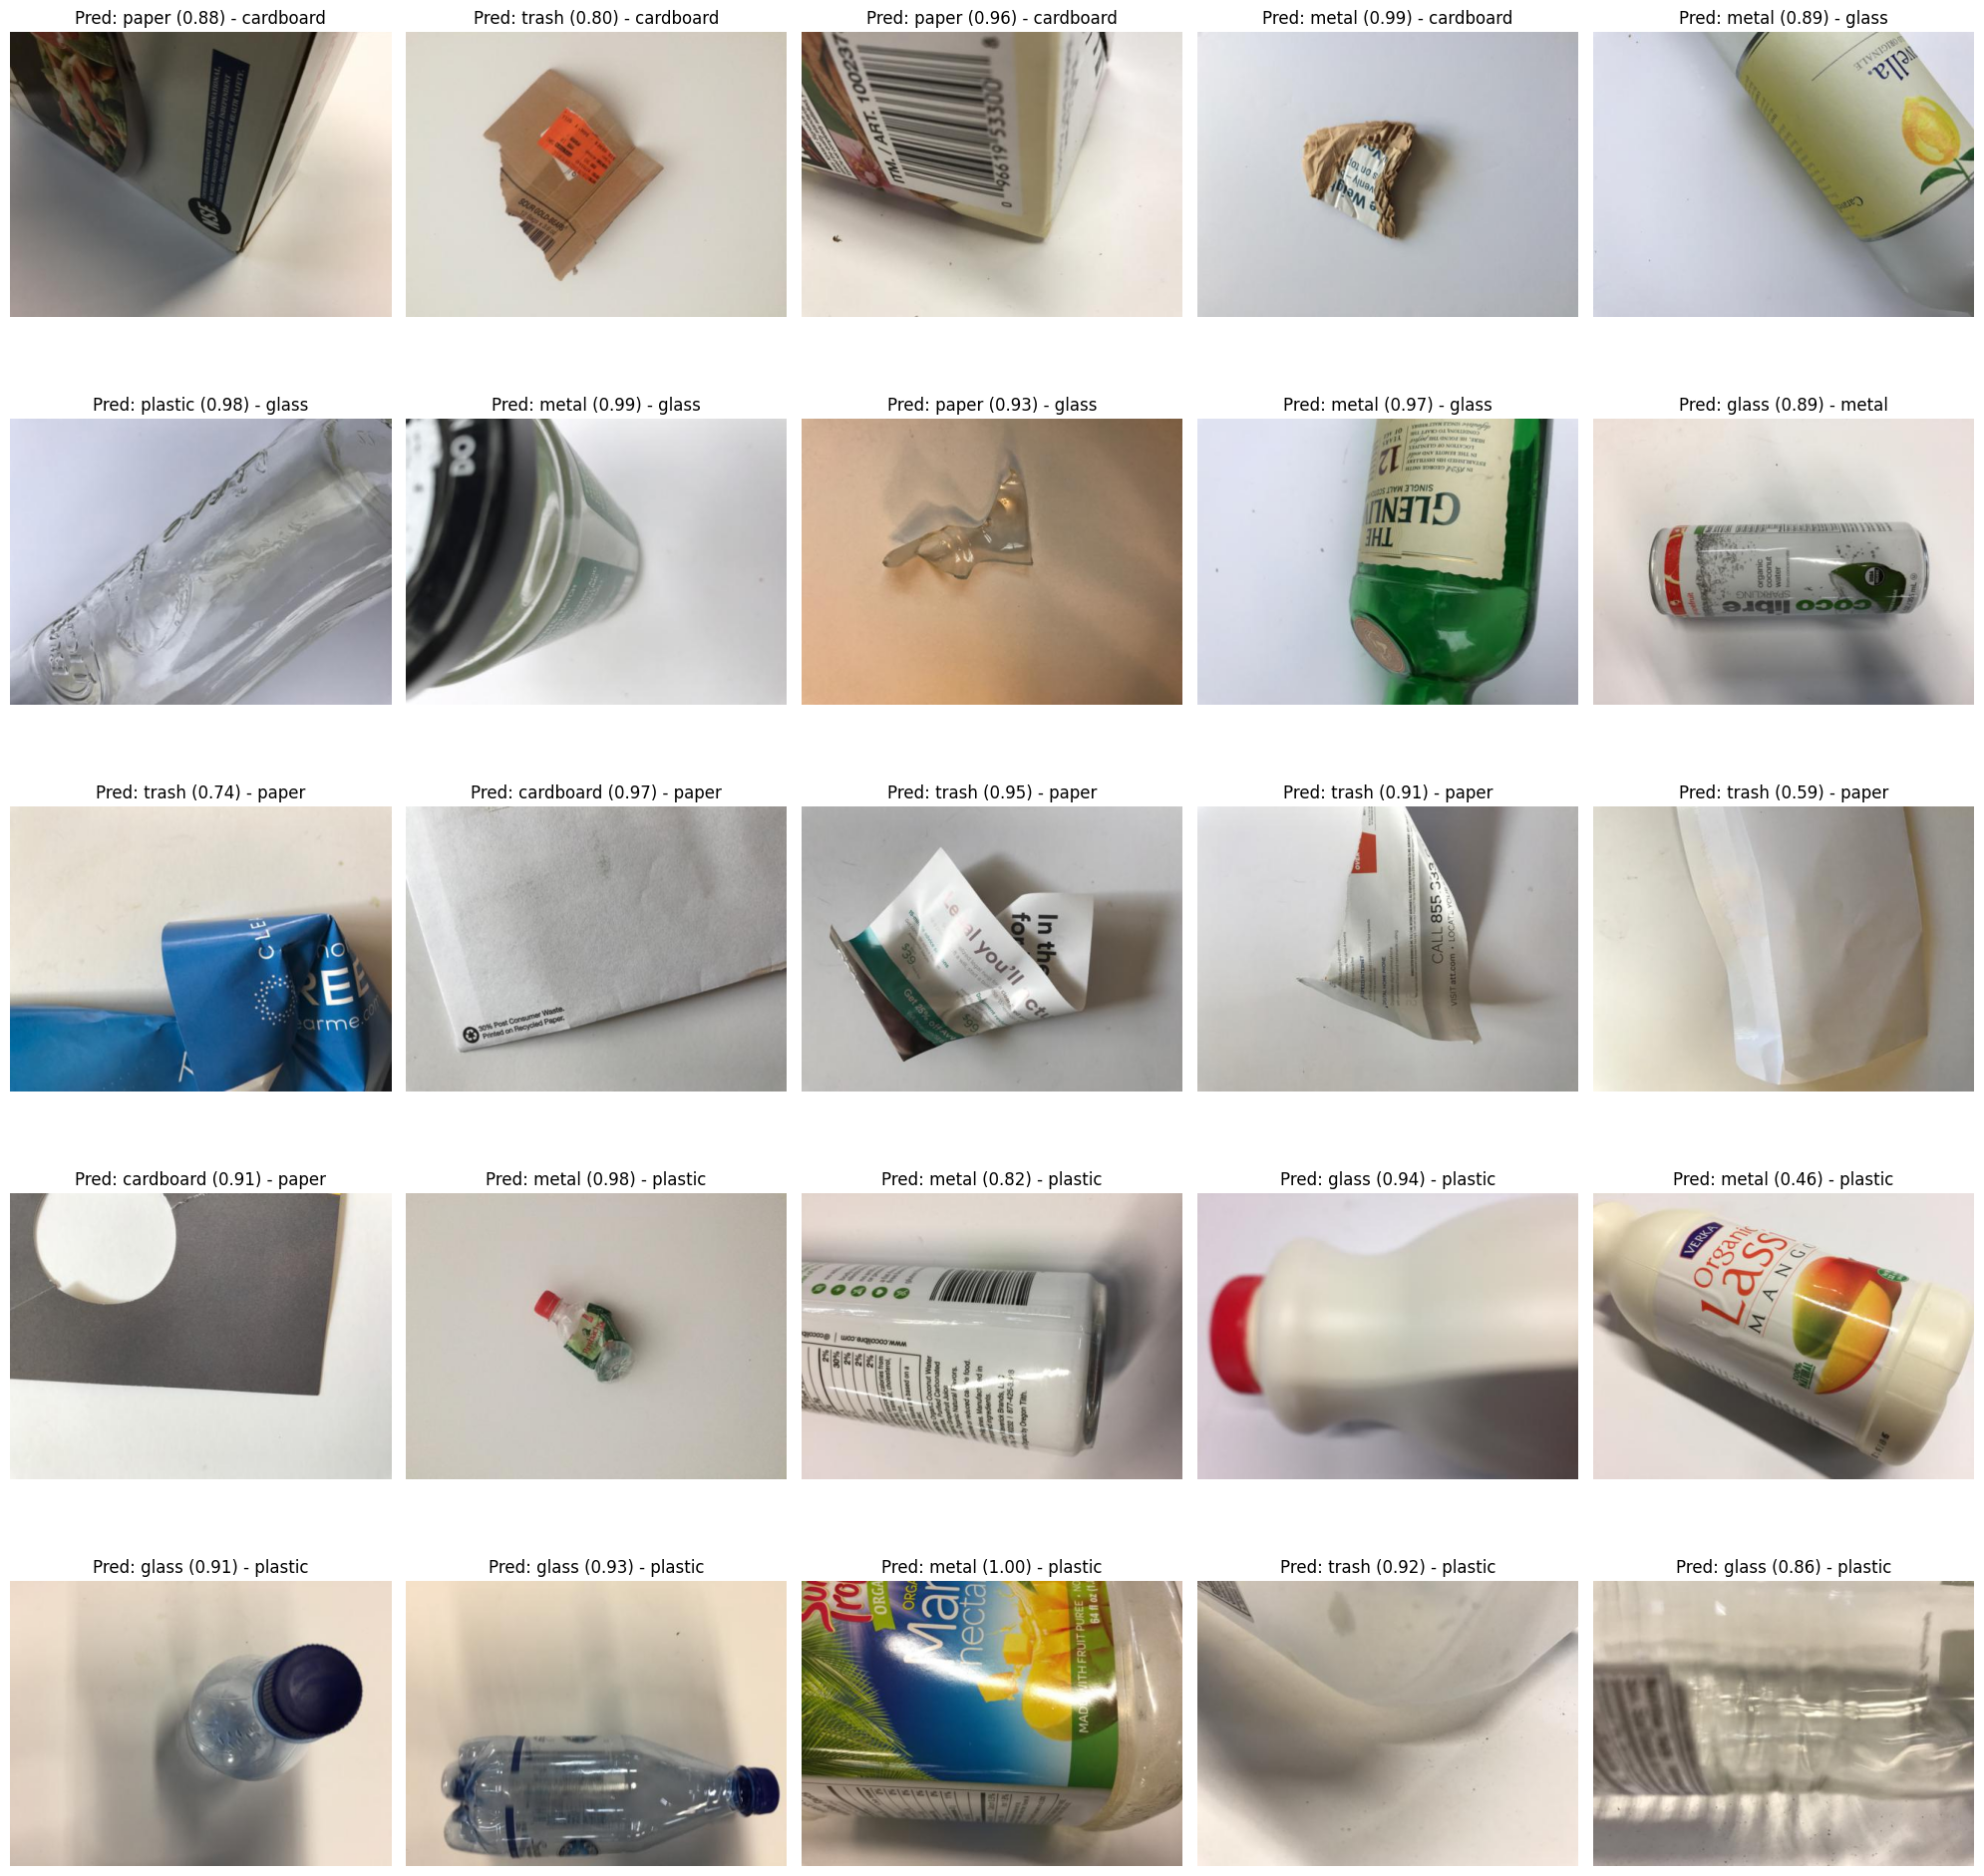

In [21]:
show_worst_preds(valid_batches, Y_pred, CLASSES)

In [120]:
# Save model
model_path = '../models/'
tf.saved_model.save(classifier.model, model_path)

INFO:tensorflow:Assets written to: ../models/assets


INFO:tensorflow:Assets written to: ../models/assets


In [49]:
train_prediction = classifier.predict(train_batches)
train_target = train_batches.classes

# 9. Save training embeddings with labels

In [90]:
embeddings_path = '../datasets/kaggle_dataset2/images/reference_images.parquet'
df_embeddings = classifier.save_training_embeddings(embeddings_path, train_target, train_prediction)

135/135 ━━━━━━━━━━━━━━━━━━━━ 25s 177ms/step


In [91]:
df_embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,954,955,956,957,958,959,target,prediction,train_prediction_score,train_class
0,0.150386,1.341476,1.931756,0.377753,1.939039,0.000000,0.378690,0.012093,-0.001577,1.261342,...,1.995067,-0.003127,-0.004489,-0.011944,-0.024568,0.000000,0,2,1.000000,cardboard
1,1.022634,0.041749,0.352246,0.292197,0.213194,-0.014693,2.176312,0.204771,0.000000,-0.039669,...,0.047053,0.062801,0.000000,0.000000,0.187267,-0.006762,0,1,0.998810,cardboard
2,0.722389,-0.005933,4.571489,0.272215,0.054854,-0.004688,-0.005650,0.417597,0.011024,0.750703,...,-0.042815,0.007109,0.000000,-0.027004,0.142219,-0.002244,0,1,0.999976,cardboard
3,0.000000,0.006708,0.300107,-0.031435,-0.023401,0.237997,0.814762,0.141663,0.242236,0.111127,...,0.145492,0.000000,0.008742,-0.013203,-0.033580,0.034314,0,0,0.999934,cardboard
4,0.562770,0.123506,2.286933,4.059822,-0.067646,0.084846,0.058184,-0.015615,0.066877,-0.020352,...,-0.029623,0.000000,0.000000,-0.067732,-0.000076,0.000000,0,1,0.925552,cardboard


In [117]:
print(classifier.model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobilenetV3large (Functional)   │ (None, 7, 7, 960)      │     2,996,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 960)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       492,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,676,884 (17.84 MB)

 Trainable params: 3,531,702 (13.47 MB)

 Non-trainable params: 25,680 (100.31 KB)

 Optimizer params: 1,119,502 (4.27 MB)

None
